In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Exploratory Data Analysis Project

Table of Contents :
1. [Introduction](#section-one)
2. [Retrieving Data](#section-two)
3. [Data Cleaning](#section-three)
4. [Feature Engineering](#section-four)
5. [Hypothesis Testing](#section-five)
6. [Summary](#section-six)

<a id="#section-one"></a>
# 1. Introduction

This dataset consists of 28 columns and 5735 rows. Please focus on the following columns

* SEQN = Respondent sequence number (
* SMQ020 = Smoking
* RIAGENDR = Gender
* RIDAGEYR = Age (years)
* DMDEDUC2 = Education level
* BMXWT  = Weight (kg)
* BMXHT = Height (cm)
* BMXBMI = BMI

<a id="#section-two"></a>
# 2. Retrieving Data

In [ ]:
# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [ ]:
# Read csv file named NHANES and save as da
df = pd.read_csv('/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/NHANES.csv')


In [ ]:
# Check some first rows
df.head(10)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
5,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,...,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
6,83741,1.0,NaN,8.0,1,1,22,4,1.0,4.0,...,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN
7,83742,1.0,NaN,1.0,2,2,32,1,2.0,4.0,...,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
8,83743,NaN,NaN,NaN,2,1,18,5,1.0,NaN,...,NaN,NaN,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0
9,83744,1.0,NaN,NaN,2,1,56,4,1.0,3.0,...,180.0,114.0,108.3,179.4,33.6,46.0,44.1,38.5,116.0,2.0


In [ ]:
# Check numbers of rows and columns
df.shape

(5739, 28)

In [ ]:
# Create a new dataframe with only the following columns: 'SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI'
data = df.filter(items=['SEQN', 'SMQ020', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'BMXWT', 'BMXHT', 'BMXBMI'])
data.head(10)
data.shape

(5739, 8)

In [ ]:
# Check types of columns using info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5739 entries, 0 to 5738
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5739 non-null   int64  
 1   SMQ020    5739 non-null   int64  
 2   RIAGENDR  5739 non-null   int64  
 3   RIDAGEYR  5739 non-null   int64  
 4   DMDEDUC2  5478 non-null   float64
 5   BMXWT     5670 non-null   float64
 6   BMXHT     5677 non-null   float64
 7   BMXBMI    5666 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.8 KB


Is there any data types which are unsuitable?

In [ ]:
# Change the column names to 'seqn','smoking','gender', 'age','education','weight','height','bmi'
new_column_names = {
    'SEQN': 'seqn',
    'SMQ020': 'smoking',
    'RIAGENDR': 'gender',
    'RIDAGEYR': 'age',
    'DMDEDUC2': 'education',
    'BMXWT': 'weight',
    'BMXHT': 'height',
    'BMXBMI': 'bmi'
}
data = data.rename(columns=new_column_names)

In [ ]:
# Check some last rows
data.tail(10)

,seqn,smoking,gender,age,education,weight,height,bmi
5729,93691,2,1,25,5.0,39.2,136.5,21.0
5730,93695,1,2,76,3.0,59.1,165.8,21.5
5731,93696,2,1,26,5.0,112.1,182.2,33.8
5732,93697,1,2,80,4.0,71.7,152.2,31.0
5733,93700,1,1,35,1.0,78.2,173.3,26.0
5734,93702,2,2,24,5.0,58.3,165.0,21.4
5735,93697,1,2,80,4.0,71.7,152.2,31.0
5736,93697,1,2,80,4.0,71.7,152.2,31.0
5737,93679,1,2,72,2.0,57.8,157.0,23.4
5738,93682,2,2,41,5.0,58.2,166.9,20.9


In [ ]:
# How many categorical cols and numerical cols
num_categorical = data.apply(lambda col: col.dtype == 'object').sum()
num_numerical = data.apply(lambda col: col.dtype != 'object').sum()
print("Number of categorical columns: ", num_categorical)
print("Number of numerical columns: ", num_numerical)


Number of categorical columns:  3
Number of numerical columns:  4


<a id="#section-three"></a>
# 3. Data Cleaning

Steps I will use in data cleaning :

1. Check for duplicate or unnecessary data
2.Check for null values or missing data
3. Check for outliers


#### 3.1 Check duplicates or unnecessary data. Remove them if any

In [ ]:
# Check for duplicates
data.duplicated().sum()


4

In [ ]:
# Remove duplicates (keep='first', inplace=True, ignore_index=False)
data.drop_duplicates(keep='first', inplace=True, ignore_index=False)
data.duplicated().sum()

0

In [ ]:
# How many rows left
data.shape

(5735, 8)

In [ ]:
# Drop the seqn col because no duplicates are present
data.drop('seqn', axis=1, inplace=True)

#### 3.2 Check for missing values and handle them

In [ ]:
# Check for missing data
data.isnull().sum()


seqn           0
smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64



*   Education: fill na with mean
*   Weight: fill na with a linear function
*   Others: fill na with median



In [ ]:
# Fill education with its mean
data.fillna({'education': data['education'].mean()}, inplace=True)

In [ ]:
# Recheck if education has missing data
data['education'].isnull().sum()

0

In [ ]:
# Fill weight HINT: use interpolate(method="linear")
data.fillna({'weight': data['weight'].interpolate(method="linear")}, inplace=True)

In [ ]:
# Recheck if weight has missing data
data['weight'].isnull().sum()

0

In [ ]:
# Fill other columns
data.fillna({'height': data['height'].median()}, inplace=True)
data.fillna({'bmi': data['bmi'].median()}, inplace=True)

In [ ]:
# Recheck if the dataset has missing data
data.isnull().sum()

smoking      0
gender       0
age          0
education    0
weight       0
height       0
bmi          0
dtype: int64

#### 3.3 Find outliers and handle outliers
Check the statistics for numerical columns

In [ ]:
# Descriptive analysis of numerical columns (MAY create a new dataframe consisting of only numerical cols and then use the describe function)
num_numerical = data.apply(lambda col: col.dtype != 'object')
num_data = data[num_numerical.index]
#num_data.head(10)
data[num_numerical.index].describe()

,smoking,gender,age,education,weight,height,bmi
count,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000
mean,1.607149,1.518919,48.052310,3.441725,81.354368,166.141290,29.368422
std,0.571975,0.499686,18.431011,1.279545,21.694721,10.024634,7.051651
min,1.000000,1.000000,18.000000,1.000000,32.400000,129.700000,14.500000
25%,1.000000,1.000000,32.000000,3.000000,65.950000,158.750000,24.400000
50%,2.000000,2.000000,48.000000,4.000000,78.200000,166.000000,28.300000
75%,2.000000,2.000000,63.000000,4.000000,92.700000,173.400000,33.000000
max,9.000000,2.000000,80.000000,9.000000,198.900000,202.700000,67.300000


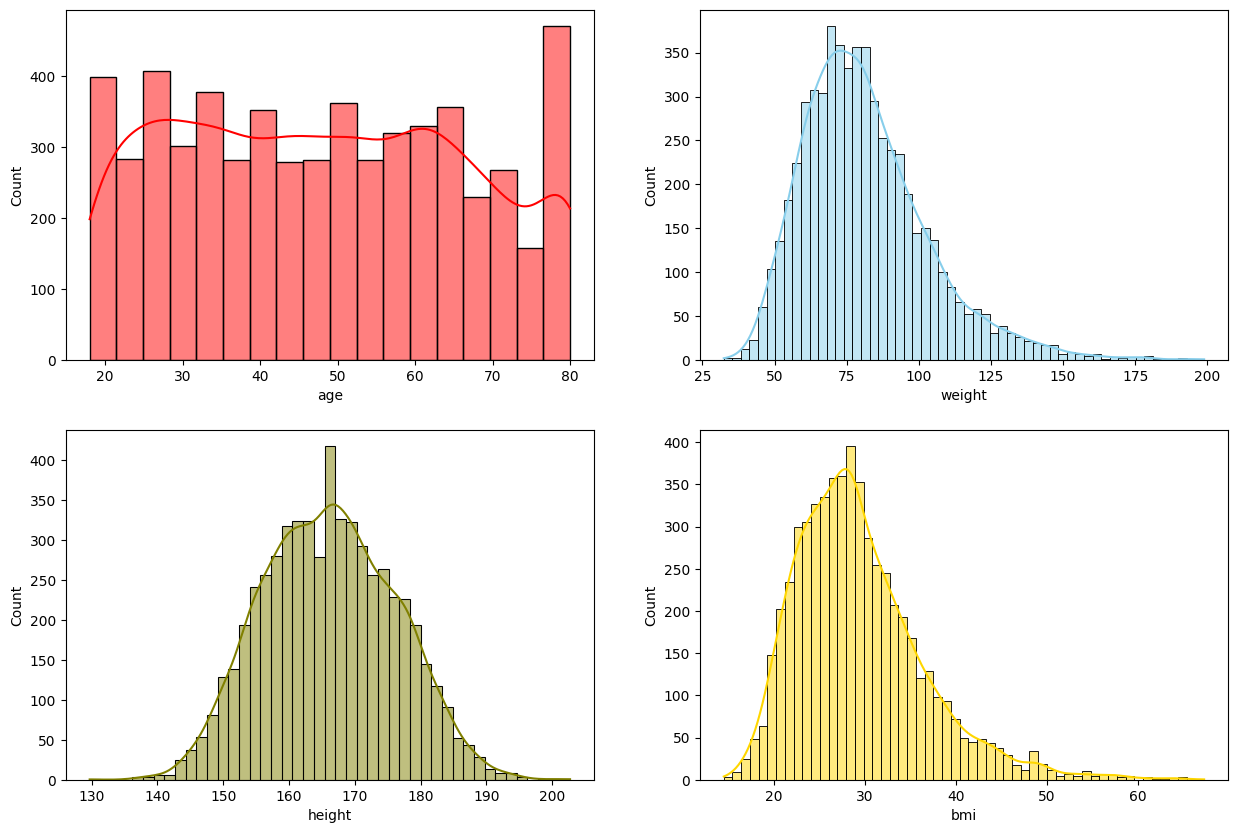

In [ ]:
# Create histograms for numerical variables and GET SOME INSIGHTS (BALANCED, RIGHT SKEWED OR LEFT SKEWED)
fig, axs = plt.subplots(2,2, figsize=(15, 10))
sns.histplot(data= data, x="age", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[1,1])
plt.show()

YOUR INSIGHT:from the above graphs, i observe that the height graph has a normal distribution, while weight and bmi graphs have a bit of right-skewed distribution as the mean of those graphs come to right of their mode.


<Axes: ylabel='bmi'>

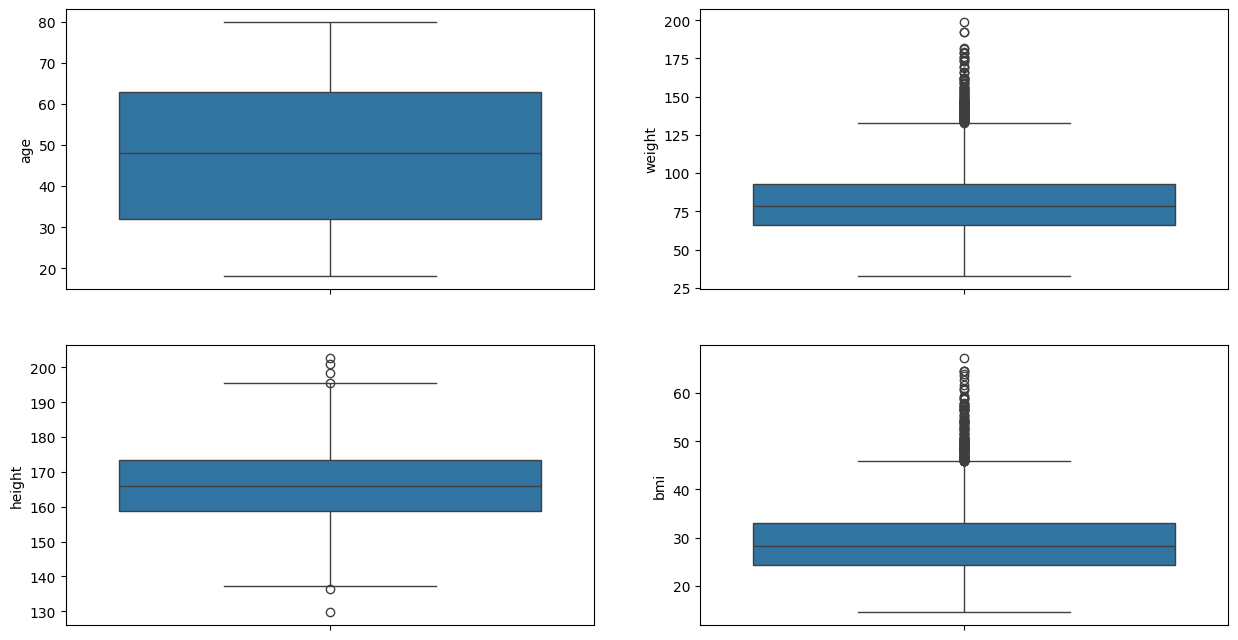

In [ ]:
# Create boxplots to observe the distribution of numerical values
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data['age'], ax = axs[0,0])
sns.boxplot(data['weight'], ax = axs[0,1])
sns.boxplot(data['height'], ax = axs[1,0])
sns.boxplot(data['bmi'], ax = axs[1,1])

YOUR INSIGHT
Weight:
Q1: ~60
Q3: ~80
IQR: Q3-Q1 = ~20
Outliers: Q3 + 1.5*IQR = 80 + 1.5* 20 = 110
-----------------------------------------------
Height:
Q1: ~160
Q3: ~180
IQR: ~20
Outliers (Upper): Q3 + 1.5*IQR = 210
Outliers (Lower): Q1 - 1.5IQR = 130
-----------------------------------------------
BMI
Q1: ~25
Q3: ~30
IQR: 30 - 25 = 5
Outliers: 30 + 1.5*5 = 37.5

According to the boxplots, age variable has no outliers. Height has normal distribution with few outliers. Meanwhile, weight and bmi have more outliers in the upper values.

Based on the observation of histogram and boxplot, I decided the outliers to be outside of minimum and maximum value for height. Meanwhile for weight and BMI, I will consider value more than maximum as outliers.

In [ ]:
# Height
qh25, qh50, qh75 = np.percentile(data['height'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

#Choose the data inside IQR
data = data[(data['height'] > minh) & (data['height'] < maxh)]

In [ ]:
# OPTIONAL
# CREATE data1 = data.copy()
# Play around with mean and std
'''
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data1['height']))

threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = data1.drop(outlier_indices)
print("Original DataFrame Shape:", data1.shape)
print("DataFrame Shape after Removing Outliers:", data1.shape)
'''

In [ ]:
# Weight
qw25, qw50, qw75 = np.percentile(data['weight'], [25,50,75])
iqrw = qw75-qw25
minw = qw25 - 1.5*iqrw
maxw =  qw75 + 1.5*iqrw

#Choose the data inside IQR (only data below the max value of weight since the data is right-skewed)
data = data[data['weight'] < maxw]

In [ ]:
# BMI
qb25, qb50, qb75 = np.percentile(data['bmi'], [25,50,75])
iqrb = qh75 - qb25
minb = qb25 - 1.5*iqrb
maxb = qb75 + 6*iqrb
print(maxb)

#Choose the data inside IQR (only data below the max value of bmi since the data is right-skewed)
data = data[data['bmi'] < maxb]

927.7


In [ ]:
print(data.max())

smoking        9.0
gender         2.0
age           80.0
education      9.0
weight       132.6
height       195.1
bmi           63.6
dtype: float64


In [ ]:
# Look at the data after removing outliers
data.shape
#=> start: 5739, after drop dup: 5735, now 5568

(5568, 7)

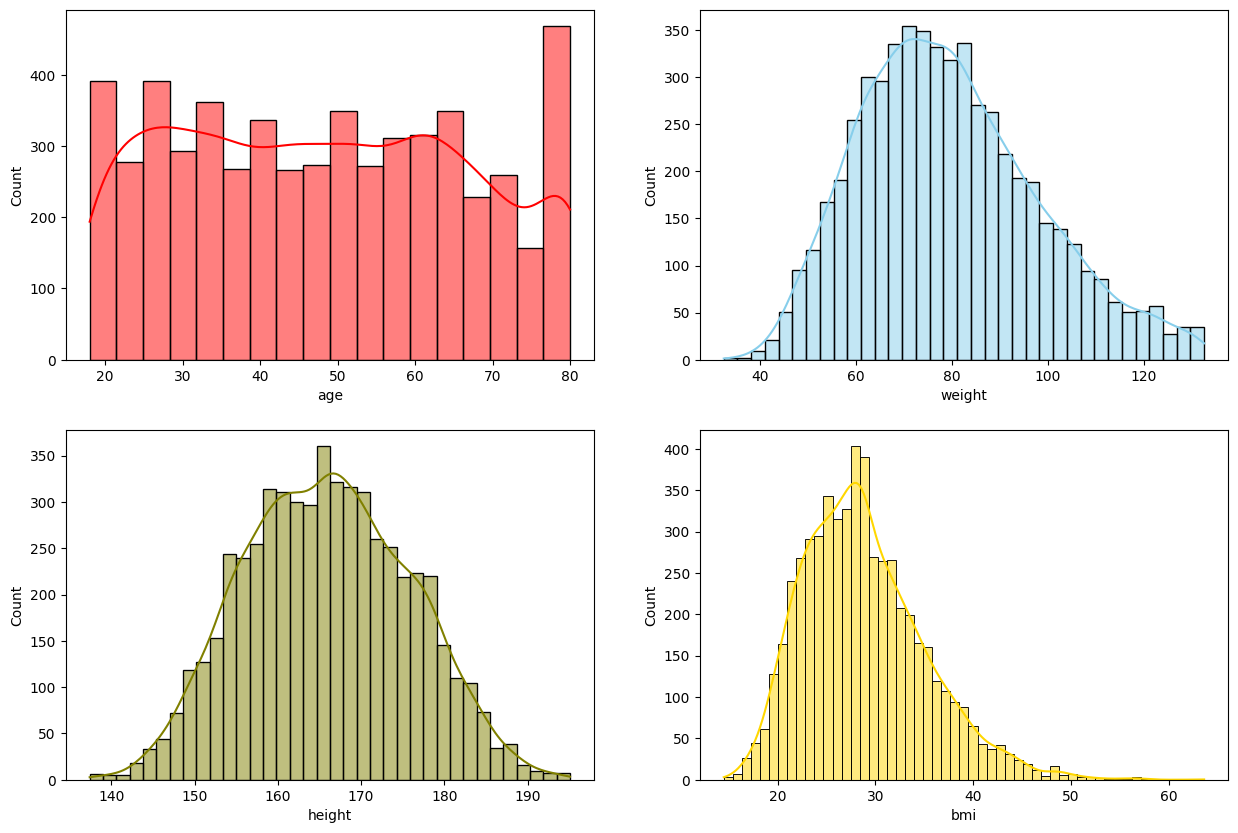

In [ ]:
# Check the distribution after removing outliers using histogram

fig, axs = plt.subplots(2,2, figsize=(15, 10))
sns.histplot(data= data, x="age", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[1,1])
plt.show()

<Axes: ylabel='bmi'>

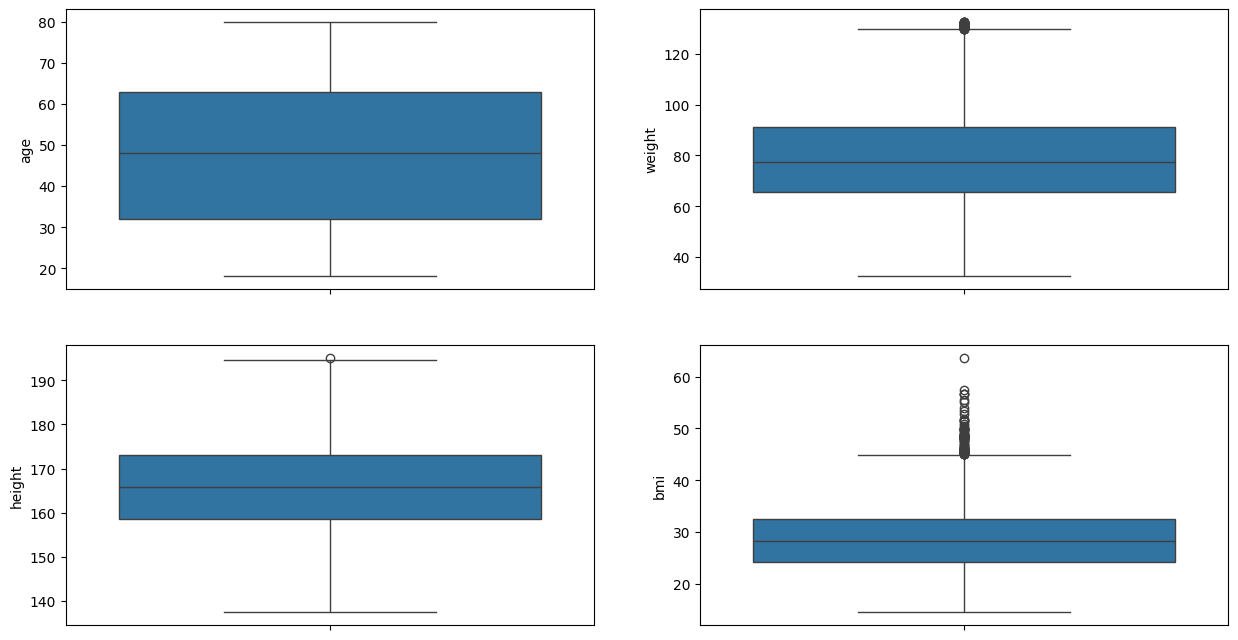

In [ ]:
# Check distribution using boxplot after removing outliers

fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data['age'], ax = axs[0,0])
sns.boxplot(data['weight'], ax = axs[0,1])
sns.boxplot(data['height'], ax = axs[1,0])
sns.boxplot(data['bmi'], ax = axs[1,1])

**Result** : the numerical values have been removed from outliers, the result is data with normal distribution.

<a id="#section-four"></a>
# 4. Feature Engineering
1. One hot encoding for categorical data
2. Pairplot features

#### 4.1 One hot encoding for categorical data

Since the categorical data have been in a type of int or float, I would translate them to object data type to make encoding easier.

In [ ]:
# smoking: 1 : 'yes', 2 : 'no', 7 : np.nan, 9 : np.nan
data['smoking'] = data['smoking'].replace({1 : 'yes', 2 : 'no', 7 : np.nan, 9 : np.nan})

#gender: 1 : 'male', 2 : 'female'
data['gender'] = data['gender'].replace({1 : 'male', 2 : 'female'})

#education: 1 : '<9th grade', 2 : '9-11th grade', 3 : 'HS or GED', 4 : 'Some college / AA', 5 : 'College or above', 7 : 'Other', 8 : 'Other'

data['education'] = data['education'].replace({1 : '<9th grade', 2: '9-11th grade', 3 : 'HS or GED', 4 : 'Some college / AA', 5 : 'College or above', 7 : 'Other', 8 : 'Other'})

In [ ]:
data.head(10)

,smoking,gender,age,education,weight,height,bmi
0,yes,male,62,College or above,94.8,184.5,27.8
1,yes,male,53,HS or GED,90.4,171.4,30.8
2,yes,male,78,HS or GED,83.4,170.1,28.8
3,no,female,56,College or above,109.8,160.9,42.4
4,no,female,42,Some college / AA,55.2,164.9,20.3
5,no,female,72,9-11th grade,64.4,150.0,28.6
6,yes,male,22,Some college / AA,76.6,165.4,28.0
7,no,female,32,Some college / AA,64.5,151.3,28.2
8,no,male,18,3.441725,72.4,166.1,26.2
9,no,male,56,HS or GED,108.3,179.4,33.6


In [ ]:
# Get the categorical data
categorical = data[['smoking','gender','education']]
categorical.head()

,smoking,gender,education
0,yes,male,College or above
1,yes,male,HS or GED
2,yes,male,HS or GED
3,no,female,College or above
4,no,female,Some college / AA


In [ ]:
# Get dummies for categorical data (drop_first=True) CREATE A NEW DATAFRAME NAMED dummy
dummy = pd.get_dummies(data, drop_first=True)
dummy.head(10)

,age,weight,height,bmi,smoking_yes,gender_male,education_9.0,education_9-11th grade,education_<9th grade,education_College or above,education_HS or GED,education_Some college / AA
0,62,94.8,184.5,27.8,True,True,False,False,False,True,False,False
1,53,90.4,171.4,30.8,True,True,False,False,False,False,True,False
2,78,83.4,170.1,28.8,True,True,False,False,False,False,True,False
3,56,109.8,160.9,42.4,False,False,False,False,False,True,False,False
4,42,55.2,164.9,20.3,False,False,False,False,False,False,False,True
5,72,64.4,150.0,28.6,False,False,False,True,False,False,False,False
6,22,76.6,165.4,28.0,True,True,False,False,False,False,False,True
7,32,64.5,151.3,28.2,False,False,False,False,False,False,False,True
8,18,72.4,166.1,26.2,False,True,False,False,False,False,False,False
9,56,108.3,179.4,33.6,False,True,False,False,False,False,True,False


#### 4.2 Pairplot Feature

Observe correlation of variables.

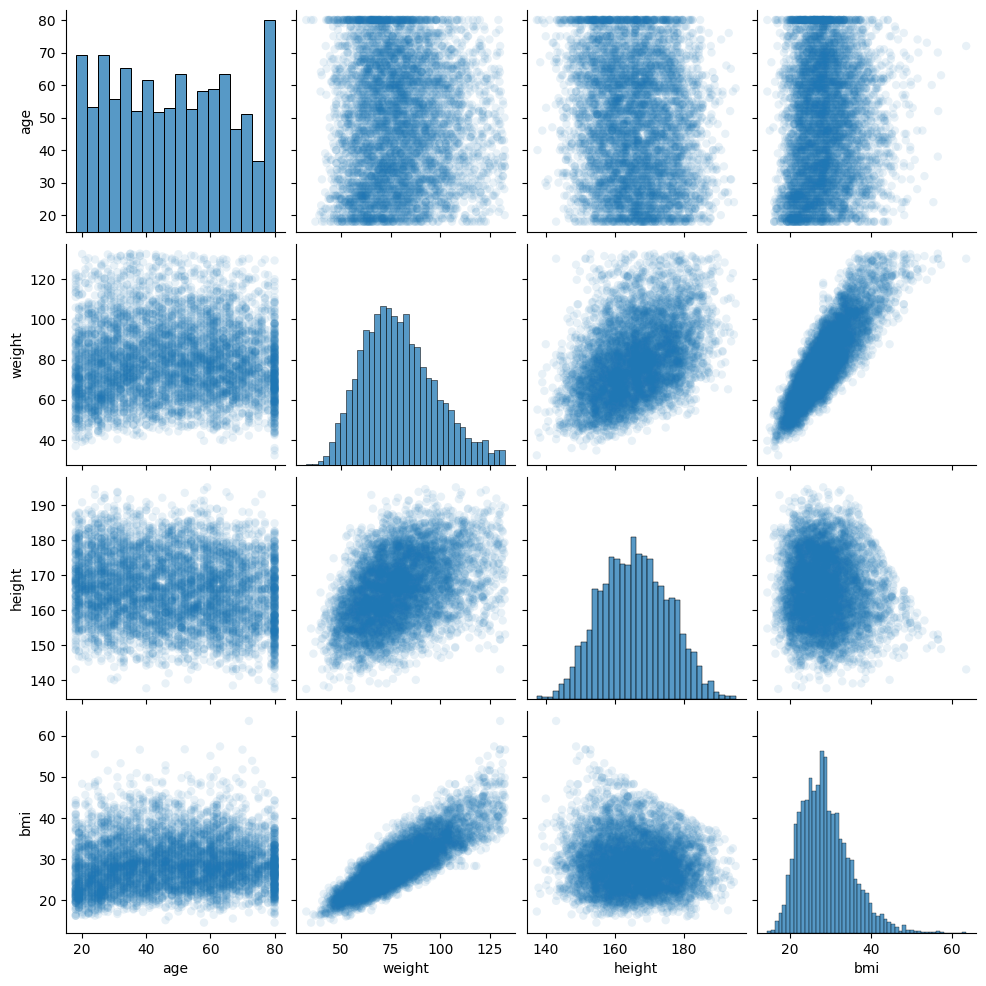

In [ ]:
# Pairplot of numerical variables
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

From pairplot above, I observe that weight has a positive correlation with BMI. Height and weight are also slightly positively correlated.

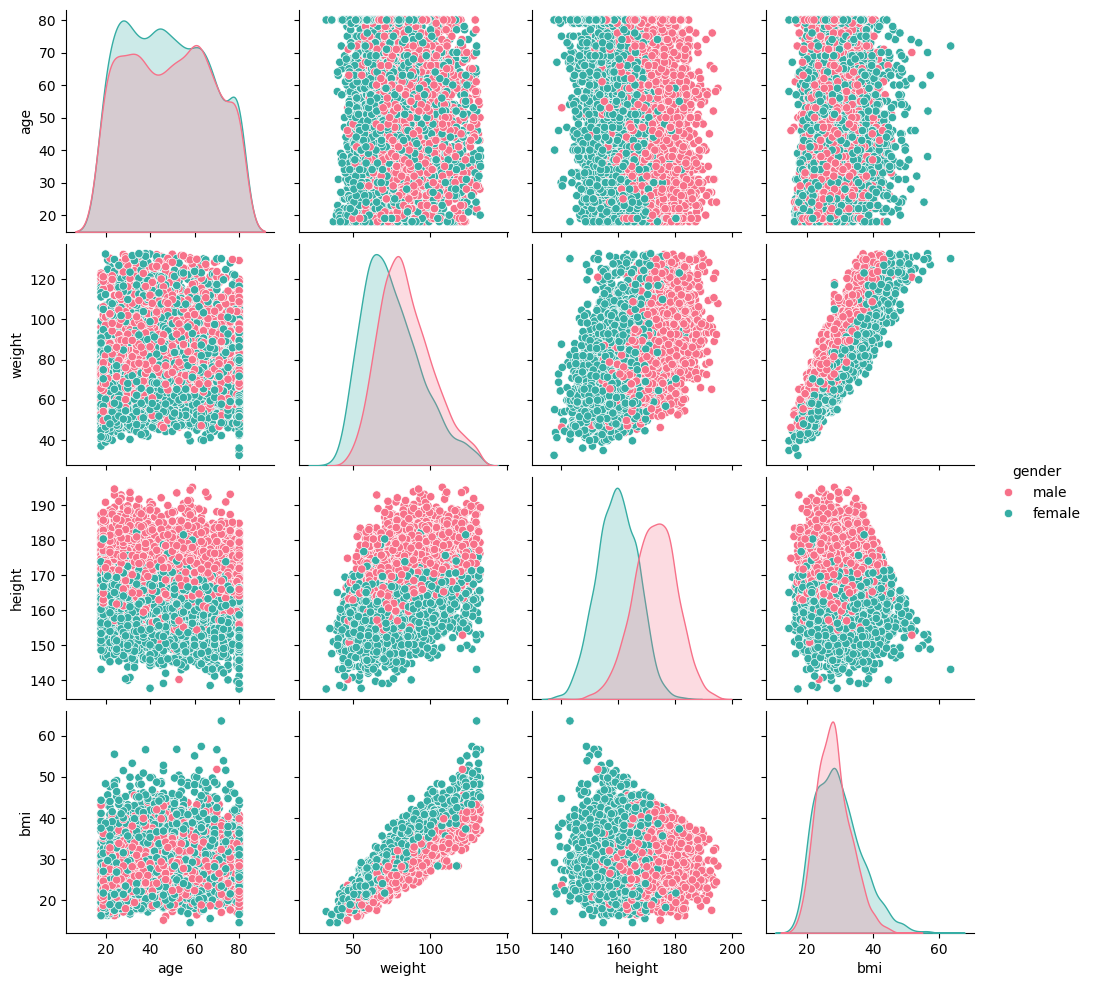

In [ ]:
# Pairplot of numerical variables divided by gender
sns.pairplot(data, hue = 'gender', palette = 'husl')

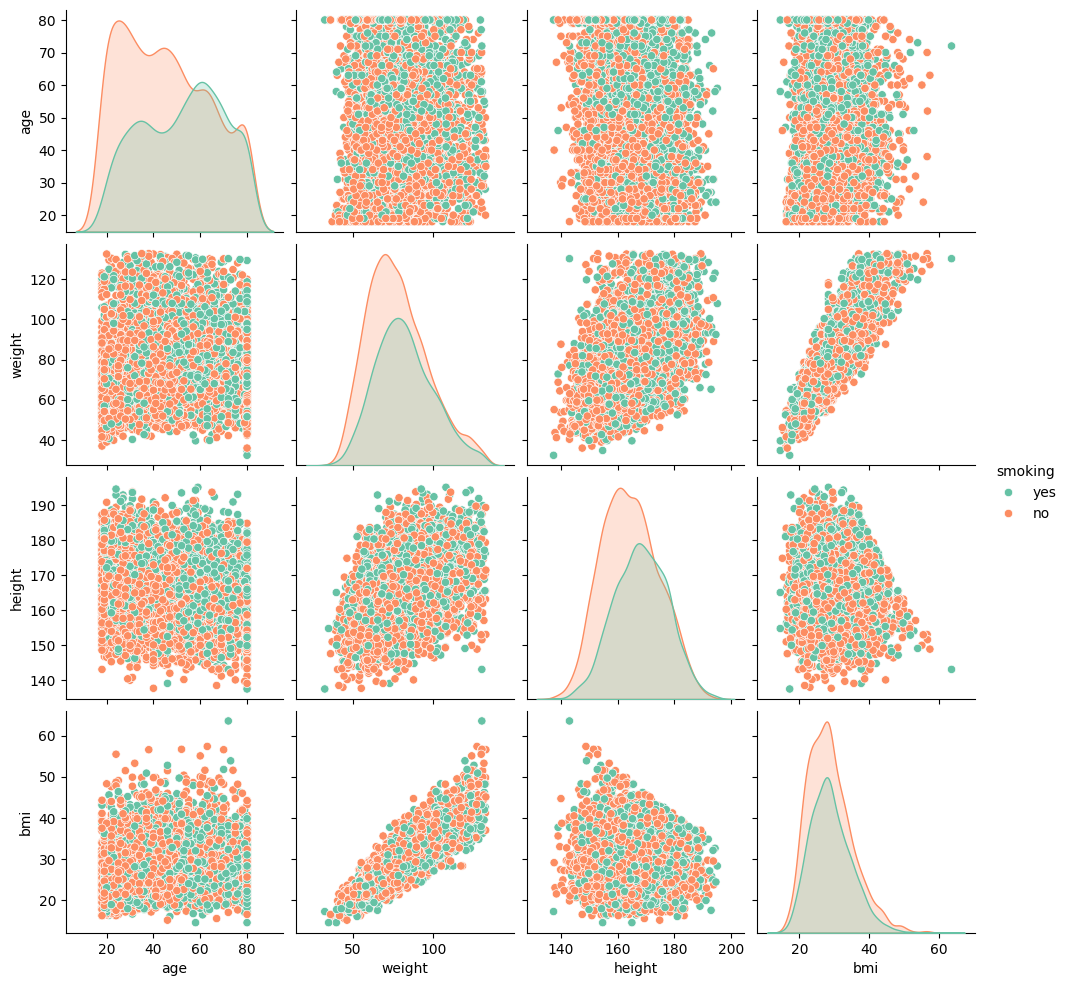

In [ ]:
# # Pairplot of numerical variables divided by smoking habit
sns.pairplot(data, hue = 'smoking', palette = 'Set2')

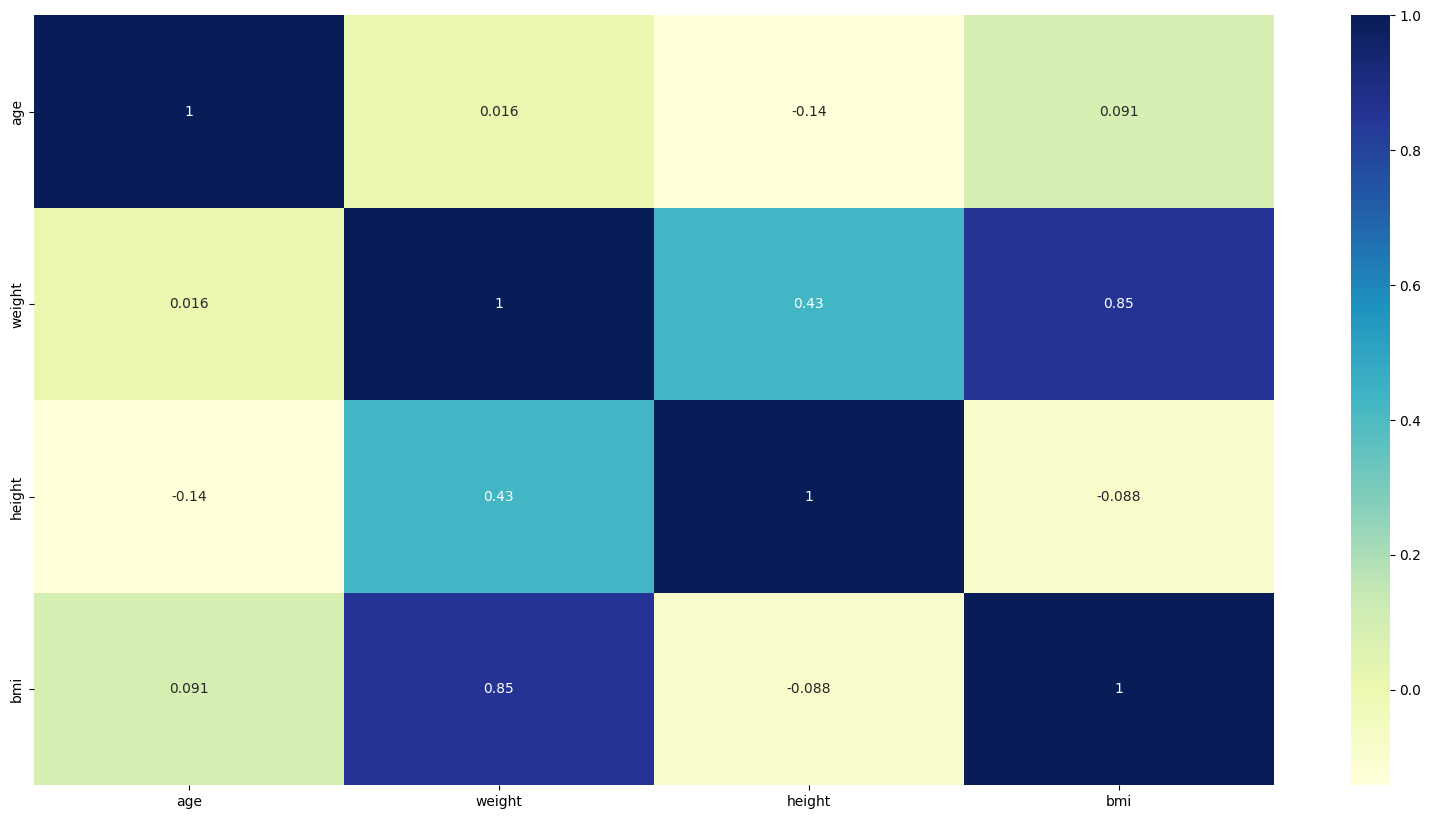

In [ ]:
# Check correlation for ONLY numerical columns
data_numerical = data[['age','weight','height','bmi']]
fig, ax = plt.subplots(figsize=(20,10))
dataplot = sns.heatmap(data_numerical.corr(), annot=True, cmap="YlGnBu", ax=ax)

<a id="#section-six"></a>
# 6. Summary

